# 타이타닉 생존자 예측하기

## 1. 데이터 읽고 전체적인 상황 확인하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc # 한글처리 위해서
plt.rcParams['axes.unicode_minus'] = False #마이너스(-)기호 깨지는거 방지

f_path = "c:/Windows/Fonts/malgun.ttf" # 한글처리 위해서
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [2]:
raw_data = pd.read_excel('../data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### 변수 설명
* pclass : 1, 2, 3등석 
* survived : 생존 여부. survived(생존-1), dead(사망-0)
* name : 이름
* sex : 
* 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호

In [4]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


* 평균 생존율 : 38.2%
* 나이 : 2개월 아기 ~ 80세 

In [5]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


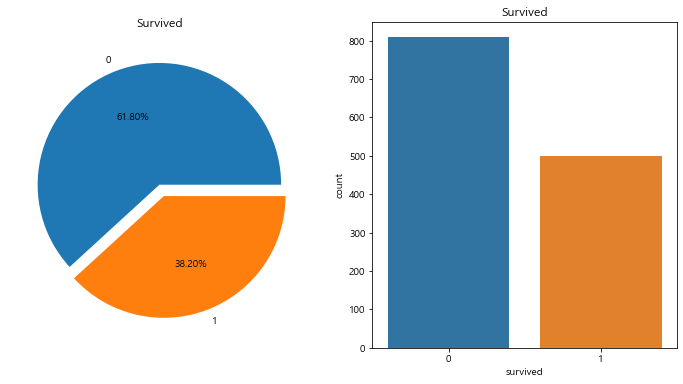

In [35]:
f,ax = plt.subplots(1,2,figsize=(12,6))

raw_data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()
# 생존율 38.2%, 대략 500명

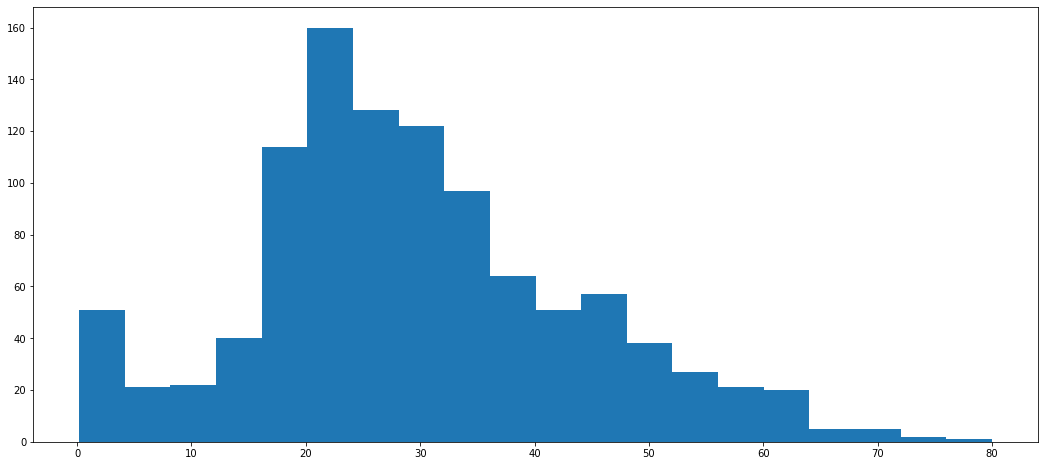

In [11]:
# 탑승한 사람들 나이
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False);

In [13]:
raw_data.groupby('pclass').mean() 
#배에 1등석에 앉은 사람들이 생존율 제일 좋고, 3등석에 앉은 사람들이 생존율 가장 낮음

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [14]:
raw_data.corr() #상관관계

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


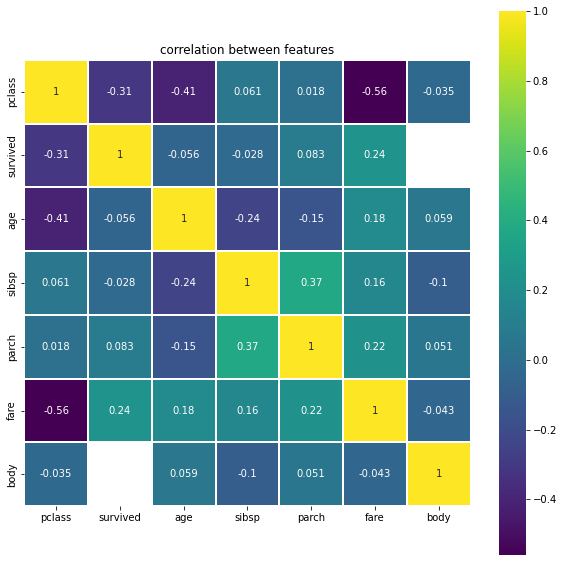

In [19]:
# 상관관계는 두 데이터의 상관관계만 확인 인과관계로 생각하면 안됩니다.
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
           annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('correlation between features')
plt.show()

## 3. 나이 구간별 및 성별 생존률 확인하기 

In [22]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                            bins = [0, 3, 7, 15, 30, 60, 100],
                            include_lowest=True,
                            labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])
raw_data.head(20)0

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old


In [ ]:
raw_data.to_excel(excel_writer = 'titanic_age1.xlsx')

In [23]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


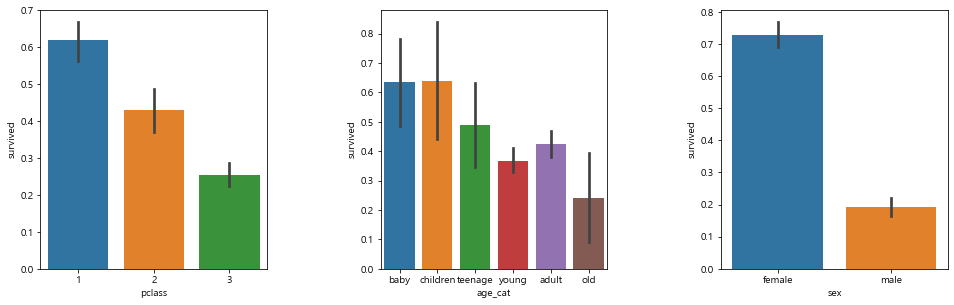

In [36]:
plt.figure(figsize=[14,4])
plt.subplot(131) #1행3열의 첫번째 그림입니다.
sns.barplot('pclass', 'survived', data=raw_data)

plt.subplot(132) #1행3열의 두번째 그림입니다.
sns.barplot('age_cat', 'survived', data=raw_data)

plt.subplot(133) #1행3열의 세번째 그림입니다.
sns.barplot('sex', 'survived', data=raw_data)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\dlfrl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dlfrl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


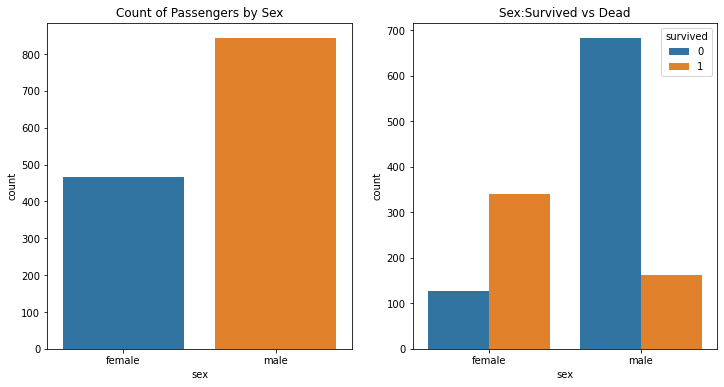

In [26]:
f, ax = plt.subplots(1,2,figsize=(12,6)) #1행 2열
sns.countplot('sex', data=raw_data, ax=ax[0]) #첫번째
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=raw_data, ax=ax[1])#두번째
ax[1].set_title('Sex:Survived vs Dead')
plt.show()
#거의 두배의 여성보다 남성이 탑승했는데 생존율을 보니 여성이 높다

### 4. 보트 탑승 승객의 생존률 확인하기.

In [27]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


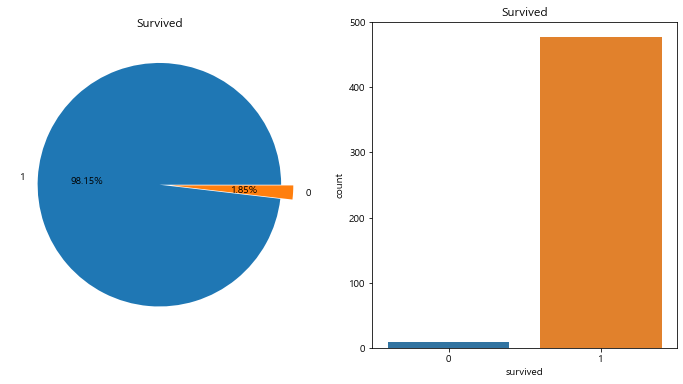

In [37]:
f, ax = plt.subplots(1,2,figsize=(12,6)) #1행 2열
boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()
# 생존자 예측하기 위한 모델을 만들때 이 항목으로 특징을 잡으면 안됨-탑승 여부만 확인하므로
# 보트탄 98프로가 생존함

### 5. 귀족들의 생존율만 다시 조사해보기

In [58]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [59]:
raw_data['name'][0].split('.')[1]

' Elisabeth Walton'

In [61]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [62]:
raw_data['name'][0].split(',')[1].split('.')[0].strip() #strip 공백없애기

'Miss'

In [53]:
test = lambda x:x+2
test(2)

4

In [54]:
list(map(test, range(5))) #map,zip,lambda살펴보기

[2, 3, 4, 5, 6]

In [63]:
conversion_rare = lambda x:x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)
print(raw_data.head())

titles = raw_data['title'].unique()
titles

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest age_cat   title  
0        

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [64]:
pd.crosstab(raw_data['title'], raw_data['sex']) 
#crosstab:(첫째열)title을 기준으로 삼아서 (두번재열)sex로 카운트

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [67]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 
        'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

for each in Rare:
    raw_data['title']=raw_data['title'].replace(each,'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [68]:
print(raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean())
#index로 안하고 title기준으로 하고 싶어서 False
#귀족으로 분류한 Rare 생존율 0.46667밖에 안되->상류층만 살아남았다고 보기 힘듦

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


### 6. 학습하기 위해 데이터를 정리하고, 특징을 선택하기

In [69]:
raw_data.head()
# 보트빼고, 귀족도 뺴고 별영향이 없어. 
# 성별이 중요했어.성별을 0,1로 바꾸려고 해

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [70]:
# 생존율 중요 인자인 성별을 머신러닝 돌리기 위해 0,1로 변환
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [71]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [72]:
# 머신러닝에 넣을 피처 선택(notnull인것만 선택)
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()
#1308개 데이터에서 1045개만 추출(not null빼니)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   int64   
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 131.9+ KB


### 7. 생존자 예측을 위한 모델 수립

In [75]:
train_pre = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
train_pre.head()
# 머신러닝은 시각적으로 확인해보고 이피쳐가 중요하다 하는것을 뽑아옴
# 머신러닝 돌리기 위해 sex등 숫자값으로 변환함

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,1,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre,
                                                   raw_data[['survived']],
                                                   test_size=0.1,
                                                   random_state=13)
#test_size 테스트는 10프로 나머지는 훈련데이터
#y값은 생존율

In [82]:
X_train.info() #940개 훈련데이터 90%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    int64  
 1   sex     940 non-null    int64  
 2   age     940 non-null    float64
 3   sibsp   940 non-null    int64  
 4   parch   940 non-null    int64  
 5   fare    940 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 51.4 KB


In [83]:
X_test.info() #105개 test 데이터 10%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    int64  
 1   sex     105 non-null    int64  
 2   age     105 non-null    float64
 3   sibsp   105 non-null    int64  
 4   parch   105 non-null    int64  
 5   fare    105 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.7 KB


In [84]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  940 non-null    int64
dtypes: int64(1)
memory usage: 14.7 KB


In [85]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [86]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3,0,37.0,0,0,7.7500
423,2,1,34.0,0,0,13.0000
646,3,0,38.0,1,5,31.3875
596,2,1,31.0,0,0,13.0000
286,1,0,63.0,1,0,221.7792


In [89]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'],axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis=1)

In [90]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,37.0,0,0,7.7500
1,2,1,34.0,0,0,13.0000
2,3,0,38.0,1,5,31.3875
3,2,1,31.0,0,0,13.0000
4,1,0,63.0,1,0,221.7792


In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))
#81프로 정확도

Score: 0.8117021276595745


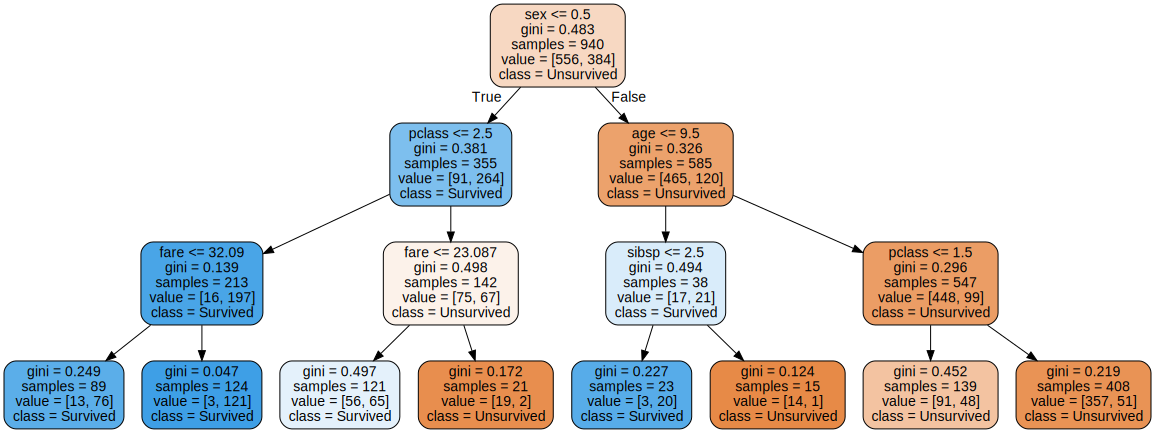

In [94]:
#트리그래프
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='titanic.dot',
    feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
    class_names=['Unsurvived', 'Survived'],
    rounded=True,
    filled=True)

import graphviz
with open ('titanic.dot')as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_tree', cleanup=True)
dot
#C:\Users\dlfrl\Anaconda3\DataScience\source\images\decision_tree

In [102]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print('Test Accuracy is', accuracy_score(y_test, y_pred)*100)

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 6 features as input.

### 8. 디카프리오 생존 예측해보기

In [108]:
#pclas, sex, age, sibsp, parch, fare
dicaprio = [3, 1, 19, 0, 0, 5]
winslet = [3, 0, 17, 1, 1, 100]

In [109]:
#predict_proba는 확률로 나타냄(전체1)
tree_clf.predict_proba([winslet]) 

array([[0.9047619, 0.0952381]])

In [110]:
tree_clf.predict_proba([dicaprio]) 

array([[0.875, 0.125]])

In [111]:
def isSurvived(name, person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive, 
          ' --> ', max(tree_clf.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)


Dicaprio  is  not survived  -->  0.875
Winslet  is  not survived  -->  0.9047619047619048


### 다른모델 확인

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
knn_clf =KNeighborsClassifier(n_neighbors=13)
knn_clf.fit(X_train, y_train)
print('Score: {}'.format(knn_clf.score(X_train, y_train)))

Score: 0.7265957446808511


In [114]:
Ran_clf = RandomForestClassifier(n_estimators=13)
Ran_clf.fit(X_train, y_train)
print('Score: {}'.format(Ran_clf.score(X_train, y_train)))

Score: 0.9680851063829787


In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [116]:
k_tree_clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(k_tree_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.69148936 0.74468085 0.84042553 0.68085106 0.77659574 0.69148936
 0.72340426 0.77659574 0.74468085 0.77659574]


In [119]:
round(np.mean(score)*100,2) 
# k_fold하니 점수가 더 낮아짐 (소수점 2번째 자리까지)

74.47

# 캐글

In [ ]:
#모델 바꾸고 테스트 해서 예측하기
#실제 데이터를 가지고 테스트 데이터 예측
submission = pd.read_csv('submission.csv')
submission.head()


* https://www.kaggle.com/c/titanic/data
* 스코아 향상(첫번째 이미지, 두번째 이미지 올리기)

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port